# MODELS STACKING
#
#

# 
# Importing libraries needed for the project
# =============================================================

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier

# 
# Importing the data into a DataFrame from our previous cleaned data files.
# =============================================================
# 

In [2]:
#Importing the data from CSV files in a dataframe.

df = pd.read_csv ('heart_disease_clean.csv', index_col= 0)
df.head ()

,Heart_Disease,High_BP,High_Chol,Weight,BMI,Smoker,Stroke,Diabetes,Phys_Activ,Eat_Fruits,Eat_Veg,Alcohol,Gen_Health,Ment_Health,Phys_Health,Diff_Walk,Sex,Age
0,0,1,1,280.0,40,1,0,0,0,0,1,0,5,18,15,1,0,9
1,0,0,0,165.0,25,1,0,0,1,0,0,0,3,0,0,0,0,7
3,0,1,1,180.0,28,0,0,0,0,1,0,0,5,30,30,1,0,9
5,0,1,0,145.0,27,0,0,0,1,1,1,0,2,0,0,0,0,11
6,0,1,1,148.0,24,0,0,0,1,1,1,0,2,3,0,0,0,11


# 
# Creating two datsets from the original, one for the terget variable (Y) and other for the dependent variables (X).
#

In [3]:
# Spliting Data into Dependent and Independetn variables, naming Y to dependent or target variable and x to the independent variables.

y = df['Heart_Disease'].copy ()
x = df.drop ('Heart_Disease', axis = 1).copy ()

# 
# ONE-HOT ENCODING. Transforming our categorical variables into dummies.
# =============================================================
# 

In [4]:
#ENCODING variables into dummies

x_categ = pd.get_dummies (x, columns = ['Diabetes', 'Gen_Health', 'Age'])

# 
# Spliting Data into Training and Testing Datasets
# =============================================================



In [5]:
#SPLIT DATA into TRAIN and TEST sets

x_train, x_test, y_train, y_test = train_test_split (x_categ, y, random_state = 42, test_size= 0.3,shuffle= True, stratify = y)

# 
#
# Creating the models that are going to be ensembled.
# ----------------------------------------------------------------------------------------------------------- 
#

# 
## Logistic Regression

In [6]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\pazen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## K-Nearest Neighbor

In [7]:
knn = KNeighborsClassifier (n_neighbors =  2, weights = 'distance', algorithm = 'auto', leaf_size = 30)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

# 
## Random Forest

In [8]:
rand_forest = RandomForestClassifier()
rand_forest.fit(x_train, y_train)

RandomForestClassifier()

# 
## XGBoost

In [9]:
xgb = xgb.XGBClassifier (objective = 'binary:logistic', seed = 42, use_label_encoder=False, learning_rate = 0.13164217591978739, 
                                max_depth = 3, min_child_weight = 4, colsample_bytree = 0.732879490463523,  scale_pos_weight = 16.5
                                gamma = 0.31697002808481123)

xgb.fit (x_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'aucpr', 
             eval_set = ([(x_test, y_test)]))


[0]	validation_0-aucpr:0.22539
[1]	validation_0-aucpr:0.28210
[2]	validation_0-aucpr:0.29818
[3]	validation_0-aucpr:0.31167
[4]	validation_0-aucpr:0.31075
[5]	validation_0-aucpr:0.31359
[6]	validation_0-aucpr:0.31306
[7]	validation_0-aucpr:0.32235
[8]	validation_0-aucpr:0.32601
[9]	validation_0-aucpr:0.32682
[10]	validation_0-aucpr:0.33236
[11]	validation_0-aucpr:0.33258
[12]	validation_0-aucpr:0.33780
[13]	validation_0-aucpr:0.33967
[14]	validation_0-aucpr:0.34062
[15]	validation_0-aucpr:0.34190
[16]	validation_0-aucpr:0.34405
[17]	validation_0-aucpr:0.34555
[18]	validation_0-aucpr:0.35020
[19]	validation_0-aucpr:0.35085
[20]	validation_0-aucpr:0.35150
[21]	validation_0-aucpr:0.35198
[22]	validation_0-aucpr:0.35322
[23]	validation_0-aucpr:0.35440
[24]	validation_0-aucpr:0.35442
[25]	validation_0-aucpr:0.35609
[26]	validation_0-aucpr:0.35721
[27]	validation_0-aucpr:0.35787
[28]	validation_0-aucpr:0.35819
[29]	validation_0-aucpr:0.35938
[30]	validation_0-aucpr:0.35958
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.732879490463523,
              enable_categorical=False, gamma=0.31697002808481123, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.13164217591978739, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=11, seed=42, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

# 
## Classification Tree

In [10]:
classtree = DecisionTreeClassifier (random_state=42)
classtree.fit (x_train, y_train)


DecisionTreeClassifier(random_state=42)

# 
# Ensembling the Stacked Model.
#

In [77]:
#Defining the estimators.
estimators = [('knn', knn), ('rand_forest', rand_forest), ('logreg', logreg), ('classtree', classtree)]

#Building the Stacked Model.
stack_model = StackingClassifier (estimators = estimators, final_estimator = xgb.XGBClassifier (objective = 'binary:logistic', seed = 42, use_label_encoder=False, learning_rate = 0.13164217591978739, 
                                max_depth = 3, min_child_weight = 4, colsample_bytree = 0.732879490463523,   scale_pos_weight = 16.5,
                                gamma = 0.31697002808481123))
                               

#Train the Ensembled Model.
stack_model.fit(x_train, y_train)

#Evaluating Model.
stack_y_pred = stack_model.predict(x_test)


C:\Users\pazen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pazen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[18:23:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pazen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


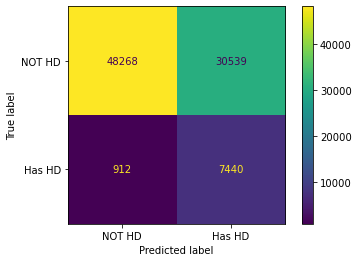

In [78]:
# PLOTING a CONFUSION MATRIX with the test data


plot_confusion_matrix (stack_model, x_test, y_test, display_labels = ['NOT HD', 'Has HD'])

In [79]:
#Save the confusion matrix and slice it into it's four component's

stack_conf = confusion_matrix (y_test, stack_y_pred)
print (stack_conf)

TP_stack = stack_conf [1,1] #True positive
TN_stack = stack_conf [0,0] #True negative
FP_stack = stack_conf [0,1] #False positive
FN_stack = stack_conf [1,0] #False negative

[[48268 30539]
 [  912  7440]]


In [80]:
#Calculating the Confusion Matrix Metrics

#Sensitivity
stack_sen = recall_score(y_test,stack_y_pred)*100
print('Sensitivity=', stack_sen,'%')

#Specificity
stack_spe = TN_stack / (TN_stack + FP_stack)*100
print ('Specificity=', stack_spe ,'%')

#Precision
stack_pre = precision_score(y_test,stack_y_pred)*100
print('Precision=', stack_pre ,'%')

Sensitivity= 89.08045977011494 %
Specificity= 61.24836626188029 %
Precision= 19.589773295768715 %


AUC= 84.00940794747748 %


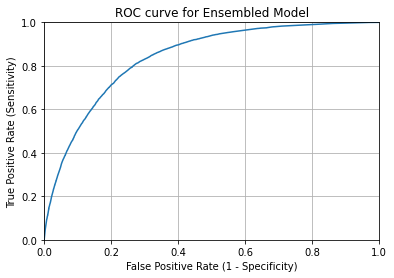

In [81]:
# ROC Curve and Area Under the Curve (AUC)

#Calculating the predicted probabilities
stack_y_pred_prob = stack_model.predict_proba(x_test) [:, 1]


#Ploting ROC Curve
fpr, tpr, roc = roc_curve(y_test, stack_y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Ensembled Model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


#Calculating AUC
lr_AUC = roc_auc_score(y_test, stack_y_pred_prob)*100
print('AUC=', lr_AUC ,'%')

In [ ]:
# We can see that our primary goal metric (recall score), has improved significantly from our best optimized model (OPTUNA XGBoost)
# wich had a recall score of 83%. We keep the ensembled model as our final model.

# 
# Saving Final Model

In [83]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(stack_model, open(filename, 'wb'))